In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

In [2]:
from google.colab import files
upload = files.upload()

Saving 3 elem.txt to 3 elem.txt
Saving 10 elem.txt to 10 elem.txt
Saving 100 elem.txt to 100 elem.txt
Saving 10000 elem.txt to 10000 elem.txt
Saving Tiempos optimos.txt to Tiempos optimos.txt


In [3]:
darkmode = False
FACECOLOR = "#36454F" if darkmode else "w"
VIDEOCOLOR = "#E64646"
FONTCOLOR = "w" if darkmode else "black"

In [4]:
import numpy as np

def read_sample(filename):
  return np.loadtxt(
    filename,
    usecols=(0, 1), delimiter=',',
    dtype={'names': ('S_i', 'A_i'),
                     'formats': ('i4', 'i4')},
    skiprows=1,
)


def df_scaloni_greedy_sort(times, sort_by):
  s, a = zip(*times)
  t = [(s[i], a[i], i) for i in range(0, len(s))]
  return sorted(t, key=sort_by, reverse=True)


def df_scaloni_greedy_best_time(times):
  data = {
      "Video": {},
      "Start": {},
      "End": {},
  }
  s_time = 0
  a_time = 0
  max_time = 0
  j = 0
  for scaloni, ayudante, i in times:
    data["Video"][j] = f"Video {i}"
    s_time += scaloni
    data["Start"][j] = s_time
    new_a_time = s_time + ayudante
    max_time = max(a_time, new_a_time)
    a_time = new_a_time
    data["End"][j] = a_time
    j += 1

  return data


def df_scaloni_greedy(times, sort_by=lambda x: x[1]):
  times_sorted = df_scaloni_greedy_sort(times, sort_by)

  return df_scaloni_greedy_best_time(times_sorted)

In [5]:
def plot_analisis(sample, name, sort_by=lambda x: x[1]):
  data_sample = df_scaloni_greedy(sample, sort_by)
  df = pd.DataFrame(data_sample)

  # project start date
  proj_start = 0

  # number of days from project start to task start
  df['start_num'] = (df.Start-proj_start)

  # number of days from project start to end of tasks
  df['end_num'] = (df.End-proj_start)

  # days between start and end of each task
  df['days_start_to_end'] = df.end_num - df.start_num

  ##### PLOT #####
  fig, (ax, ax1) = plt.subplots(2, figsize=(16,6), gridspec_kw={'height_ratios':[6, 1]}, facecolor=FACECOLOR)
  ax.set_facecolor(FACECOLOR)
  ax1.set_facecolor(FACECOLOR)
  # bars
  ax.barh(df.Video, df.days_start_to_end, left=df.start_num, color=VIDEOCOLOR, alpha=1)

  for idx, row in df.iterrows():
      ax.text(row.start_num-0.1, idx, row.Video, va='center', ha='right', alpha=0.8, color=FONTCOLOR)


  # grid lines
  ax.set_axisbelow(True)
  ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')

  # ticks
  xticks = np.arange(0, df.end_num.max()+1)
  xticks_labels = pd.RangeIndex(proj_start, df.End.max()+1)
  xticks_minor = np.arange(0, df.end_num.max()+1)
  ax.set_xticks(xticks)
  ax.set_xticks(xticks_minor, minor=True)
  ax.set_xticklabels(xticks_labels, color=VIDEOCOLOR)
  ax.set_yticks([])

  plt.setp([ax.get_xticklines()], color=FONTCOLOR)

  # align x axis
  ax.set_xlim(0, df.end_num.max())

  # remove spines
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['left'].set_position(('outward', 10))
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color(FONTCOLOR)




  plt.suptitle('ANÁLISIS DE AYUDANTES', color=FONTCOLOR)

  # clean second axis
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)
  ax1.spines['top'].set_visible(False)
  ax1.spines['bottom'].set_visible(False)
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax.set_xlabel("Tiempo", color=FONTCOLOR)

  plt.savefig(f'{name}.png', facecolor=FACECOLOR)

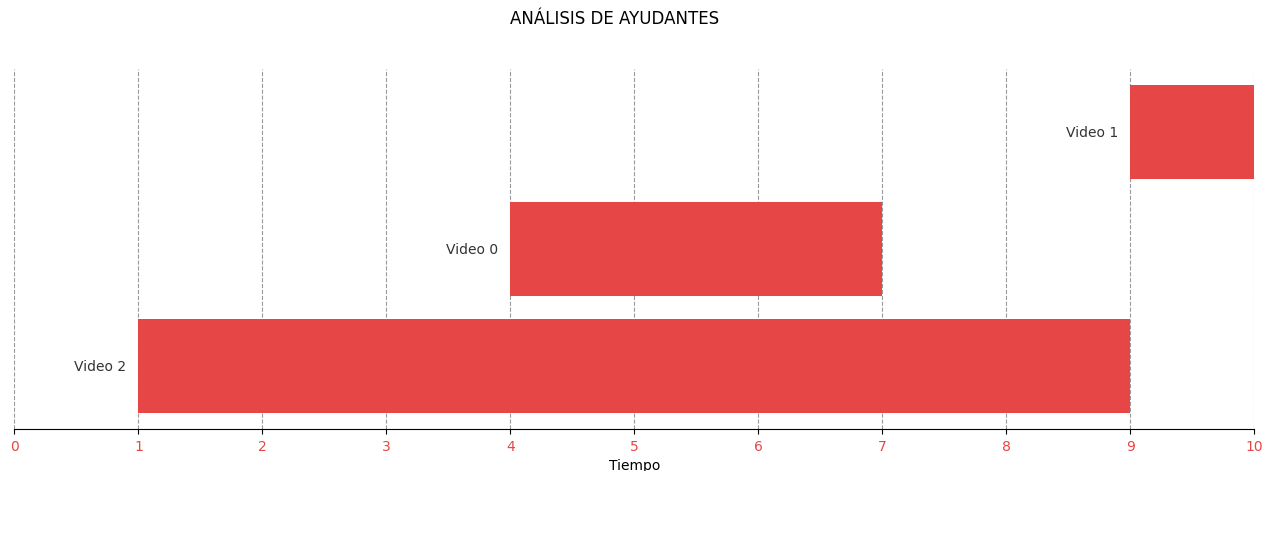

In [6]:
sample = read_sample("3 elem.txt")
plot_analisis(sample, "3")

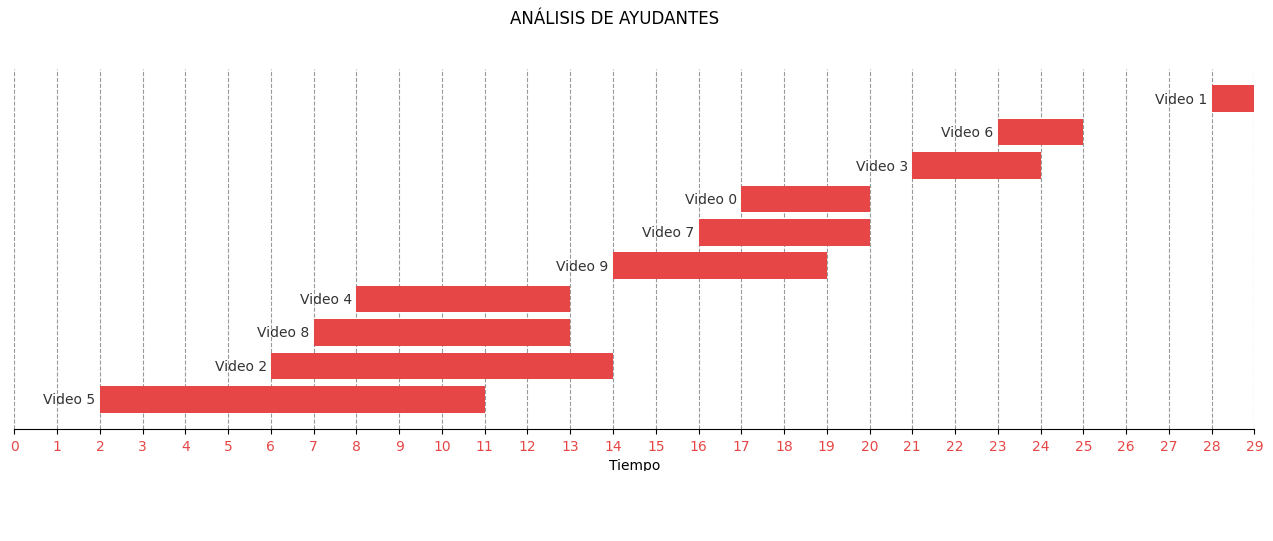

In [7]:
sample = read_sample("10 elem.txt")
plot_analisis(sample, "10")

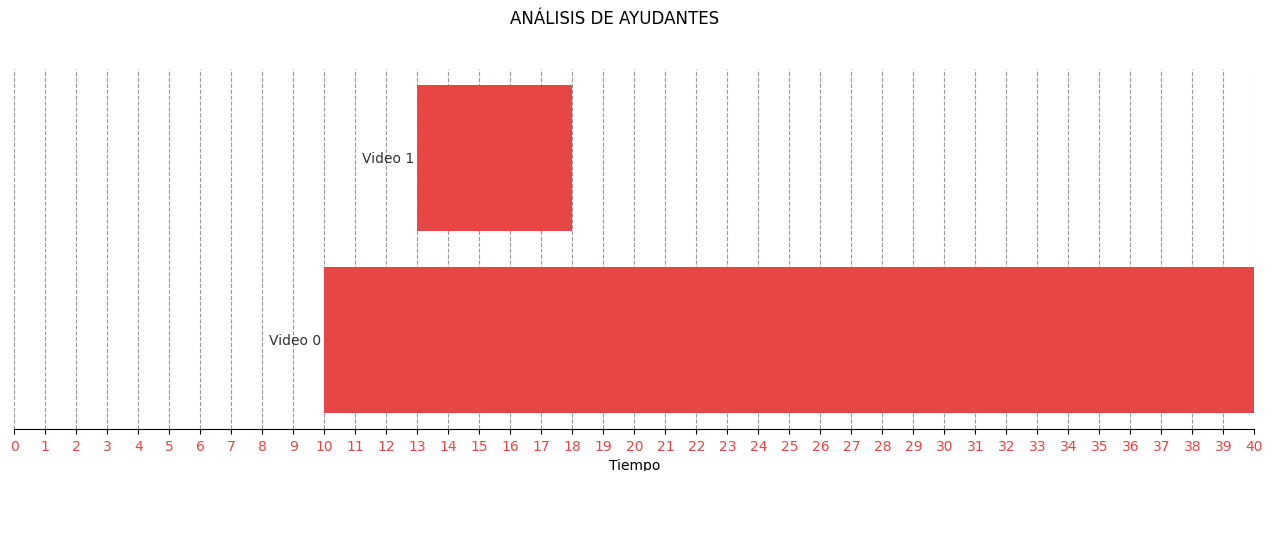

In [8]:
sample = [(10, 30), (3, 5)]
plot_analisis(sample, "Cuadro 1")

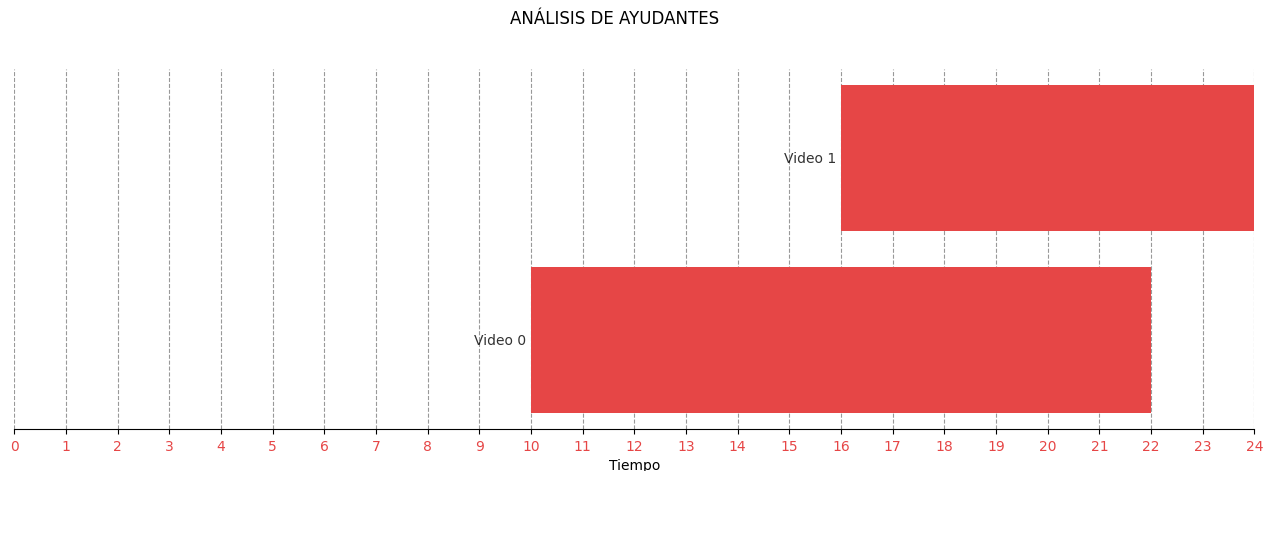

In [9]:
sample = [(10, 12), (6, 8)]
plot_analisis(sample, "Cuadro 2")

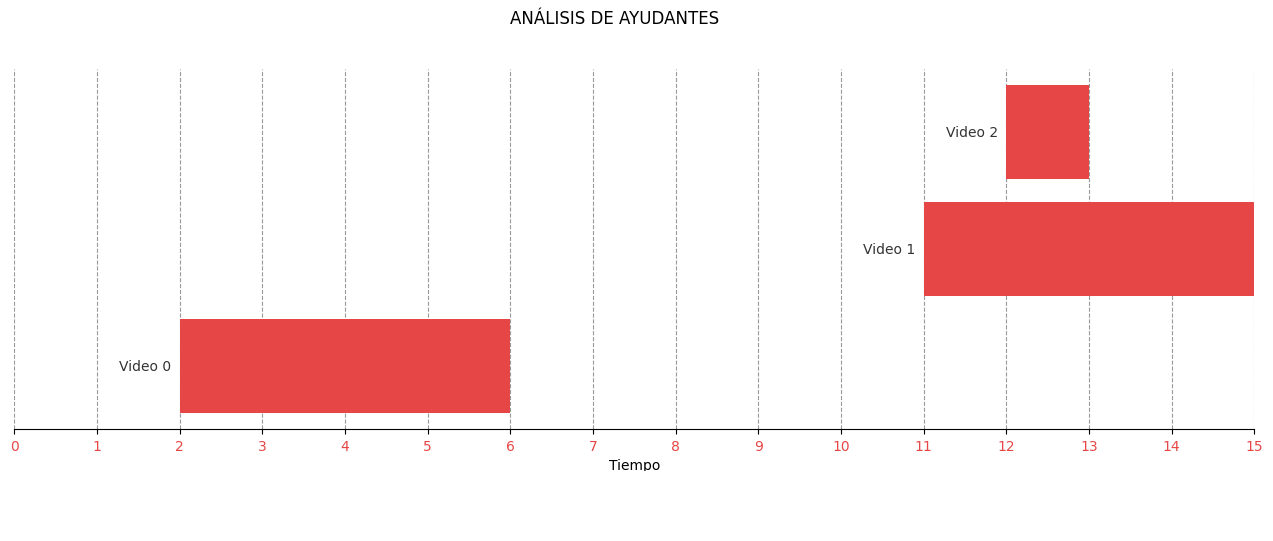

In [10]:
sample = [(2, 4), (9, 4), (1, 1)]
plot_analisis(sample, "Cuadro 4")

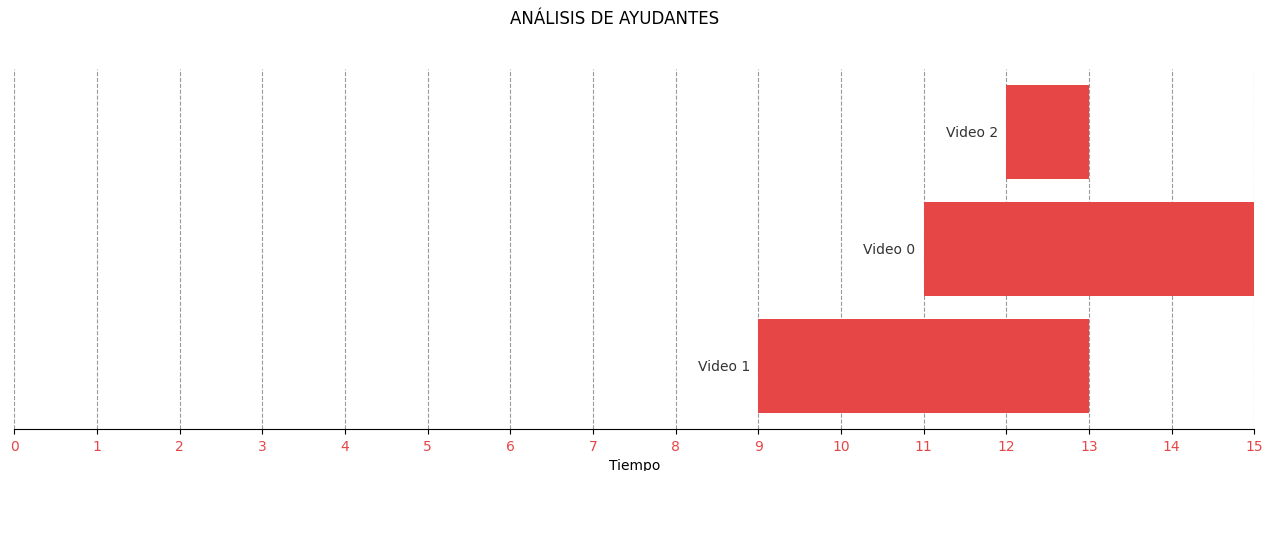

In [11]:
sample = [(2, 4), (9, 4), (1, 1)]
plot_analisis(sample, "Cuadro 4 bis", lambda x: (x[1], x[0]))

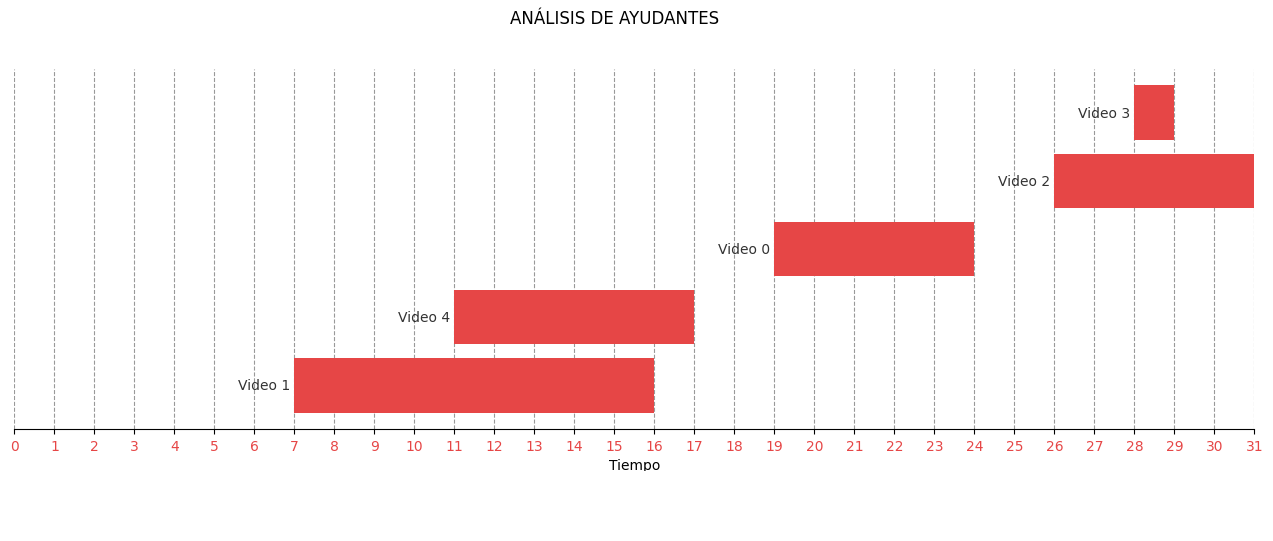

In [12]:
sample = [(8, 5), (7, 9), (7, 5), (2, 1), (4, 6)]
plot_analisis(sample, "Ejemplo random 1")

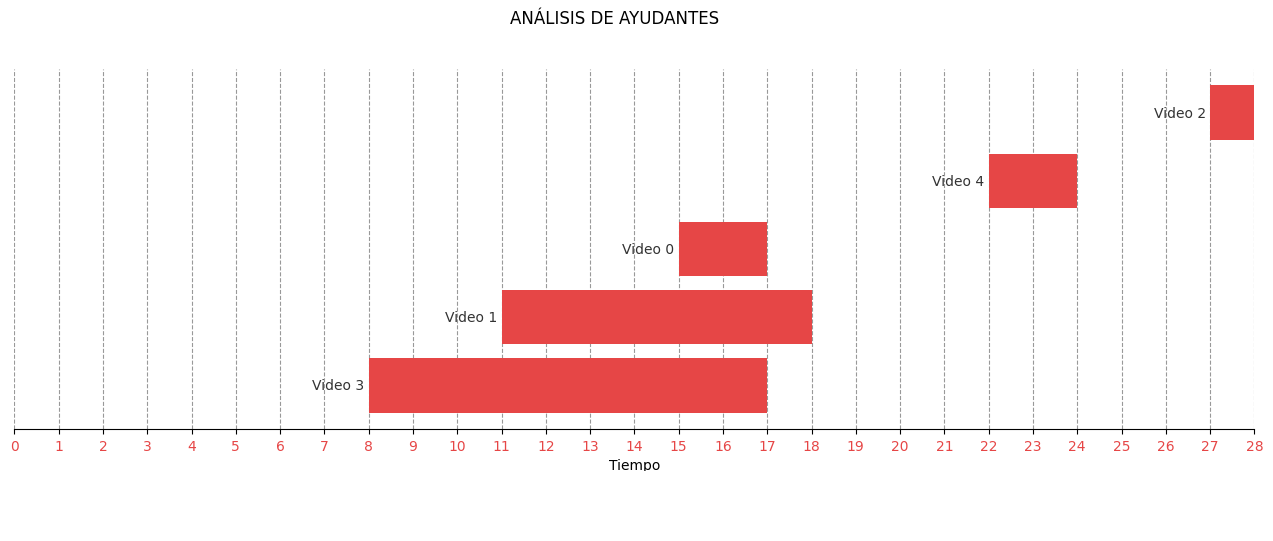

In [13]:
sample = [(4, 2), (3, 7), (5, 1), (8, 9), (7, 2)]
plot_analisis(sample, "Ejemplo random 2")